# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
df = pd.read_csv('18.01.11_RU_videos.csv', encoding='utf-8')
df.head(15)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,i2U4V2FKUWY,15 см не приговор/О плагиате и Рэперах/Творчес...,2018-10-31T15:58:59.000Z,UCtGJ_XI0ZGwEmKZaj3VQITw,Настя Ивлеева,22,18.01.11,#НАСТЯИВЛЕЕВА|#AGENTGIRL|#AGENTSHOW|#DJARAXOV|...,540477,37314,2302,1645,https://i.ytimg.com/vi/i2U4V2FKUWY/default.jpg,False,False,ссылка на альбом Эльдар Джарахова: https://ban...
1,SUvbRpZZDq4,Маша и Медведь - Halloween с Машей!🎃 Самые стр...,2018-10-31T10:45:00.000Z,UCRv76wLBC73jiP7LX4C3l8Q,Маша и Медведь,1,18.01.11,МашаМедведь|Мультфильм|новый сезон|masha and t...,1016793,6725,1399,679,https://i.ytimg.com/vi/SUvbRpZZDq4/default.jpg,False,False,Веселый Хэллоуин с Машей!🎃Самые страшные серии...
2,BpJA_Xh75as,"Мот — По Буквам (премьера клипа, 2018)",2018-10-30T08:57:21.000Z,UCKKsIRc-1LytrgiPLTKmNDQ,МОТ,10,18.01.11,блек стар|блэк стар|блекстар|блэкстар|blakc st...,1634615,82872,6495,4325,https://i.ytimg.com/vi/BpJA_Xh75as/default.jpg,False,False,Слушай и скачивай трек здесь: http://black-sta...
3,CNJmCUv8xoI,Мой маленький пони 4/7. Мультик Летучие мыши!,2018-10-31T11:35:29.000Z,UCWaCaCyWgPk6uwKh66fl_0A,Дружба - это чудо!,1,18.01.11,май литл пони|дружба это чудо|литл пони|май по...,145969,2472,122,511,https://i.ytimg.com/vi/CNJmCUv8xoI/default.jpg,False,False,"Мой маленький пони 4 сезон, 7 серия. Мультик Л..."
4,mQyGwLfrORo,"КОРОЧЕ ГОВОРЯ, ОДИН ДОМА на ХЭЛЛОУИН [От перво...",2018-10-31T10:00:35.000Z,UCK8o7PWlBPbzhajib_P7FKg,ИККЕРО,22,18.01.11,короче говоря|короче|короче говоря один дома|к...,446706,24390,656,11602,https://i.ytimg.com/vi/mQyGwLfrORo/default.jpg,False,False,"КОРОЧЕ ГОВОРЯ, ОДИН ДОМА на ХЭЛЛОУИН [От перво..."
5,aDJmxSaj7bg,Школьницы упали с большой высоты в столичном Т...,2018-10-31T06:00:01.000Z,UCIme7og-uTpdRXRgm0zzA2A,Москва 24,25,18.01.11,м24|москва|московские новости|столица|новости ...,215979,798,1182,907,https://i.ytimg.com/vi/aDJmxSaj7bg/default.jpg,False,False,Подписывайтесь на наш канал в YouTube: https:/...
6,Z3-qDMAYzdg,"14 фокусов и трюков, чтобы удивить друзей",2018-10-31T12:00:08.000Z,UCA8x119TMd1esbI3woeIbQg,Трум Трум СЕЛЕКТ,26,18.01.11,фокусы и трюки|опыты с арбузом|необычные фокус...,238267,4685,394,690,https://i.ytimg.com/vi/Z3-qDMAYzdg/default.jpg,False,False,Подписывайся на канал: https://goo.gl/EhngTP22...
7,xK54ojFKnpk,ПОСЛЕДНИЙ ПРЫЖОК В КРУГАХ | Все-таки Бабешкин ...,2018-10-31T11:09:11.000Z,UC0qfFtXolx1UrElt2kd1niA,Вадим Бабешкин,17,18.01.11,прыжки в воду|как прыгать в воду|плавание|басс...,176730,11867,349,663,https://i.ytimg.com/vi/xK54ojFKnpk/default.jpg,False,False,Все пошло не по плану. Нереальный прыжок в кру...
8,naZJks6qkxc,Путин отказался подписывать закон о пенсионной...,2018-10-31T10:32:44.000Z,UCgCqhDRyMH1wZBI4OOKLQ8g,Pravda GlazaRezhet,22,18.01.11,Pravda GlazaRezhet|правда глаза режет|Путин|Ро...,208380,13461,1451,3417,https://i.ytimg.com/vi/naZJks6qkxc/default.jpg,False,False,"На телевидении и в газетах объявили, что Путин..."
9,I_tg2vV3Q8g,УГРОЗЫ ОТ ЛЕВ ПРОТИВ ПОСЛЕ ВИДЕО / FACE НАЕХАЛ...,2018-10-31T15:00:41.000Z,UCNb2BkmQu3IfQVcaPExHkvQ,SOBOLEV,22,18.01.11,соболев|sobolev|лев против|разборка|конфликт|т...,1042943,149615,7713,5797,https://i.ytimg.com/vi/I_tg2vV3Q8g/default.jpg,False,False,Я все равно тебя найду - угрозы от Лев Против ...


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
video_id             200 non-null object
title                200 non-null object
publishedAt          200 non-null object
channelId            200 non-null object
channelTitle         200 non-null object
categoryId           200 non-null int64
trending_date        200 non-null object
tags                 200 non-null object
view_count           200 non-null int64
likes                200 non-null int64
dislikes             200 non-null int64
comment_count        200 non-null int64
thumbnail_link       200 non-null object
comments_disabled    200 non-null bool
ratings_disabled     200 non-null bool
description          193 non-null object
dtypes: bool(2), int64(5), object(9)
memory usage: 22.4+ KB


In [66]:
category_data = pd.read_json('RU_category_id.json')
cat_dict = {k['id']: k['snippet']['title'] for k in category_data['items']}
cat_dict['29'] = 'Unknonw' #в данных есть категория, которые не представляена в дополнительном файле-под id 29 сборная солянка видео

### 1. Можем посмотреть на количсетвенное распределение катеогрий и сделать вывод: какие категории видео чаще попадают в тренды
В этом может помочь столбчатая диаграмма

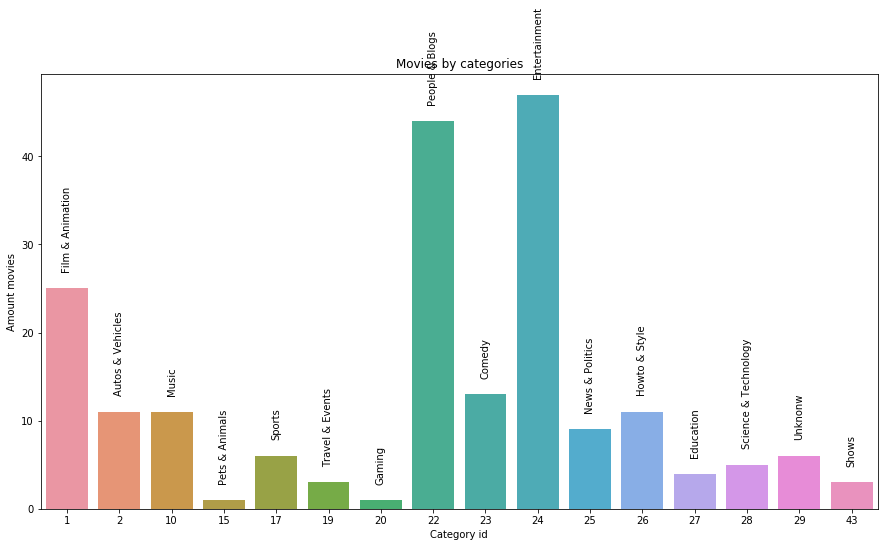

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))
data_by_cat = df[['title', 'categoryId']].groupby('categoryId').count()
sns.barplot(x='categoryId', y='title', data=data_by_cat.reset_index(), axes=ax)

plt.title('Movies by categories')
plt.xlabel('Category id')
plt.ylabel('Amount movies')

for i, rows in enumerate(data_by_cat.iterrows()):
    plt.annotate(cat_dict[str(rows[0])], xy=(i, rows[1]['title'] + 2), rotation=90, ha='center')

#Вопрос: как можно вместить надписи в график?

Как видим, самые популярные категории: 'People & blogs' и 'Entertainment' (в России любят болги и развлекательные видео, то есть чаще на YouTube идут за отдыхом и неенапряжным контентом), а самыми не популярными среди топов являются 'Gaming' (специфичная тема, ей интересуется маленькая группа людей) и 'Pets & Animals'-жаль котики уже не в топе :(

### 2. Когда чаще всего выкладываются видео, которые входят в тренды?

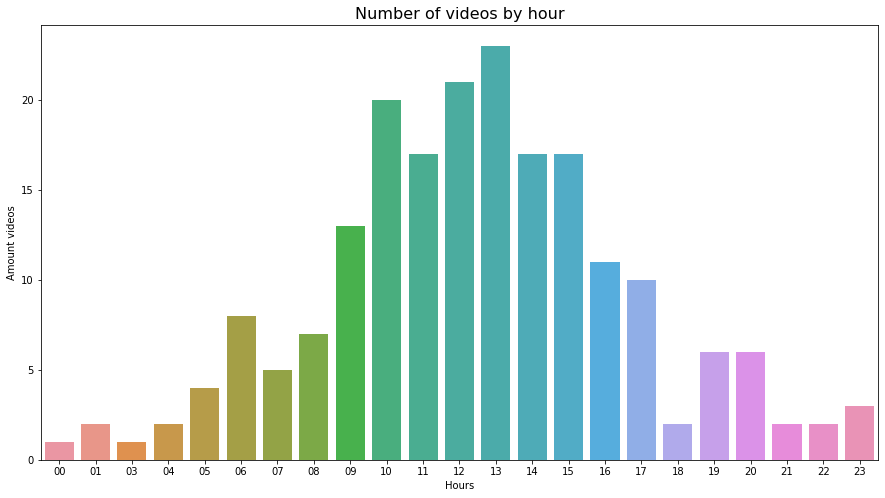

In [68]:
df['publishedHours'] = pd.to_datetime(df['publishedAt']).apply(lambda x: x.strftime('%H'))
hours_sum = df['publishedHours'].value_counts().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='index', y='publishedHours', data=hours_sum, axes=ax)
ax.set(xlabel='Hours', ylabel='Amount videos')
ax.set_title('Number of videos by hour', fontsize =16)
plt.show()

Чаще всего видео выкладываю в районе полудня, точнее в 13 часов. Возможно, начиная именно с этого времени ютуб начинают смотреть более активно и видео успевает выйти в тренды. Также заметно, что видео выпущенные после 20 часов имеют маньший шанс попасть в тренды.

### 3. Определим корреляцию между различными атрибутами

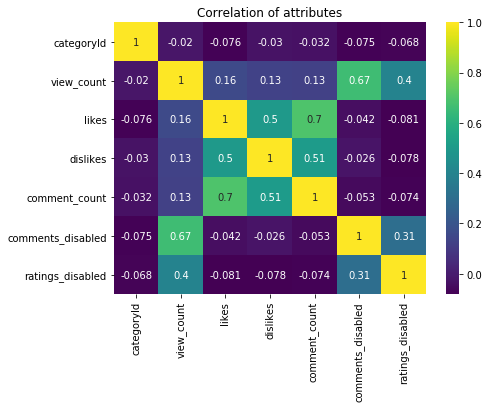

In [69]:
corrmat = df.corr()

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
ax.set_title('Correlation of attributes')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.show()

Есть достаточно логичная зависимость между лайками/дизлайками и комментариями. Причем между, если человек поставил лайк, то он напишет комментарий с большей вероятностью, чем тот, кто поставит дизлайк. Интересно, что также есть зависисмость между количеством просмотров и отключенными комментариями. Возможно для некоторых блогеров с ростом популярности увеличивается количество нежелательных комментариев и они закрывают их.

### 4. Посмотрим на распределение таких атрибутов, как просмотры, лайки, дизлайки и  комментарии

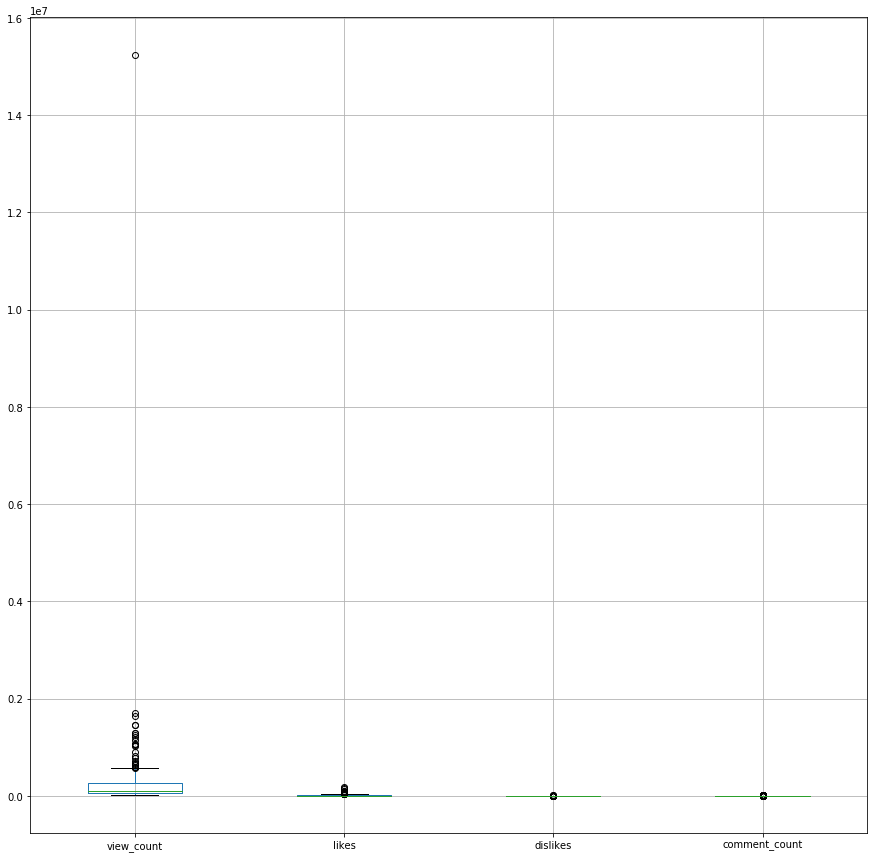

In [70]:
plt.figure(figsize=(15,15))
top_attrs = ['view_count', 'likes', 'dislikes', 'comment_count']
df.boxplot(top_attrs)

Как-то оценивать данные по таким графикам практически нереально. Пока что видно то то, что у просмотров очень много выбросов и особенно картину портит самый наибольшй выброс. Давайте взглянем на него поближе.

In [71]:
df.loc[df['view_count'] == df['view_count'].max()]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishedHours
169,wrQT-hUyweg,Cute Village girl Care Horse And Start Trainin...,2018-10-30T11:54:30.000Z,UCr--8c6eg62aTQC5E5SeW4w,Clarence Bond,22,18.01.11,Clarence Bond|learn how to care horse|my siste...,15244666,0,0,0,https://i.ytimg.com/vi/wrQT-hUyweg/default.jpg,True,True,Welcome to my Channel and Help Subscribe : htt...,11


Это явно похоже на неправильно собранные данные или другой вид ошибки, потому что на видео 0 лайков, дизлайков  и комментариев и колличество просмоторов слишком запределеное. В любом случае, этот ролик сильно выбивается из общей картины данных и сомнительно может помочь нам при анализе. Удалим эту строку и снова посмотрим на данные: отдельно выведем просмотры.

In [72]:
df = df.drop(np.where(df['view_count']==15244666)[0])

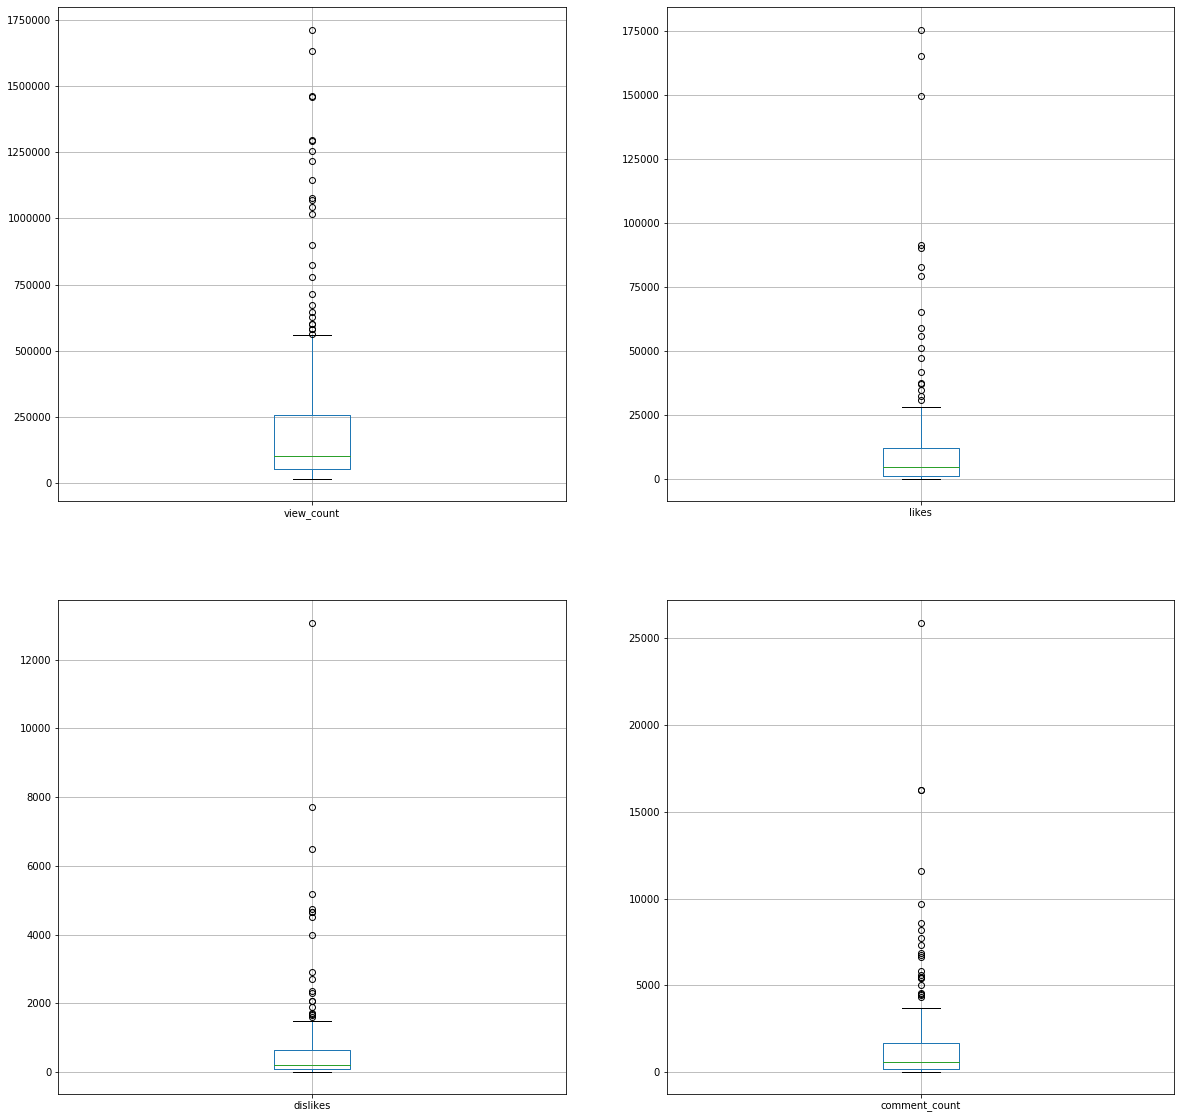

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
for i, col in enumerate(top_attrs):
    df.boxplot(col, ax=axes[i // 2, i % 2])

Как видим, все 4 атрибута все еще содержат очень много выбросов, которые мешают воспринимать информацию. Это могут быть какие-то эксклюзивные видео, которые вызвали много шумихи и они явно выделяются из общей массы. Такое воличество активностей могли получить ролики, которые смотрели и на которые реагировали даже те групы людей, которые не склонны к просмотрам YouTube. 

### 5. Посмотрим на распределение таких атрибутов, как лайки и  дизлайки и комментарии в зависимости от просмотров

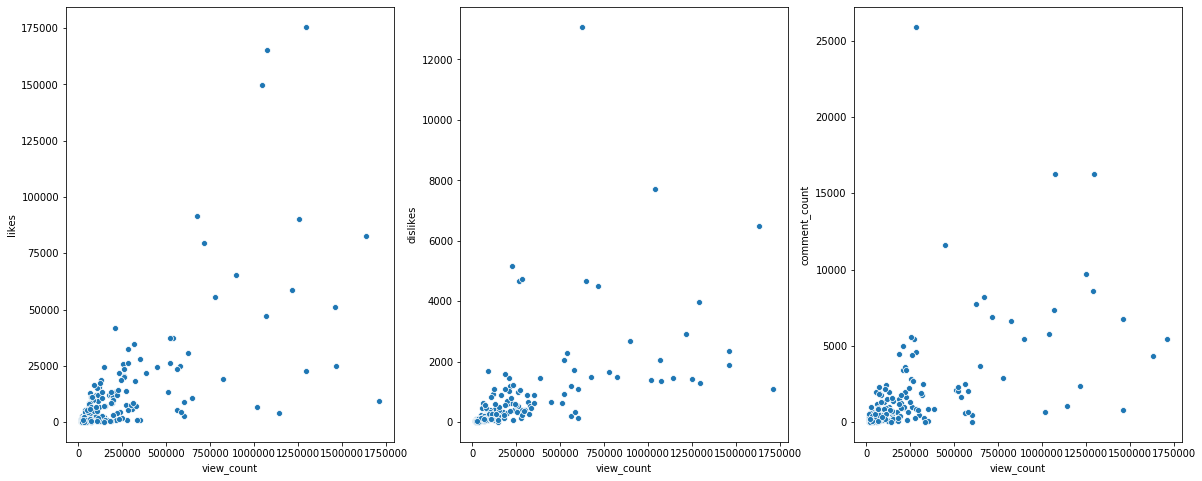

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
for i, col in enumerate(['likes', 'dislikes', 'comment_count']):
    sns.scatterplot('view_count', col, data=df, x_bins=5, ax=axes[i])

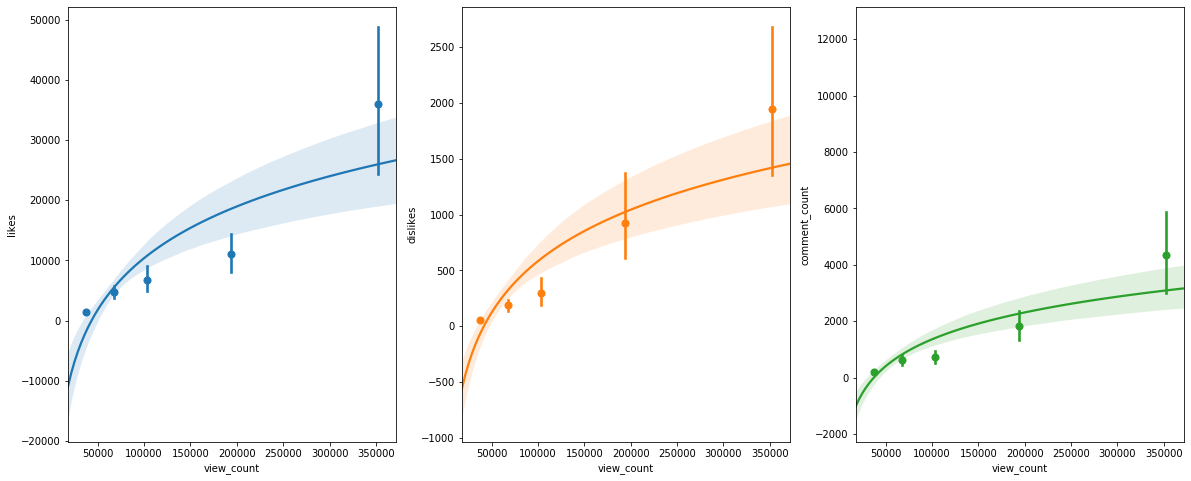

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
for i, col in enumerate(['likes', 'dislikes', 'comment_count']):
    sns.regplot(data=df, x='view_count', y=col, x_bins=5, logx=True, ax=axes[i])


Если постараться не смотреть на слишком явные выбросы, то можно заметить, что зависимость по характеру напоминает логарифмическую (особенно для комментариев). То есть изначально зависимость трех показателей лайки,диклайки и комменты зависят почти линейно от просмотров, но при како-то достаточно большом количестве просмотров из скорость роста замедляется. Можно предположить, что ролики, которые набирают много просмотров и лайков алгоритмы YouTube начинают показывать более широкому кругу пользователей в качестве рекомендованных, а такие просмотры приносят меньше лайков и комментариев, чем от аудитории, которым изначально был интересен ролик или сам канал.

### 6. Все со всеми
Посмотрим, как связаны все числовые признаки между собой. Также добавим новый признак-день недели (1-понеделник). Используем scatter plot matrix

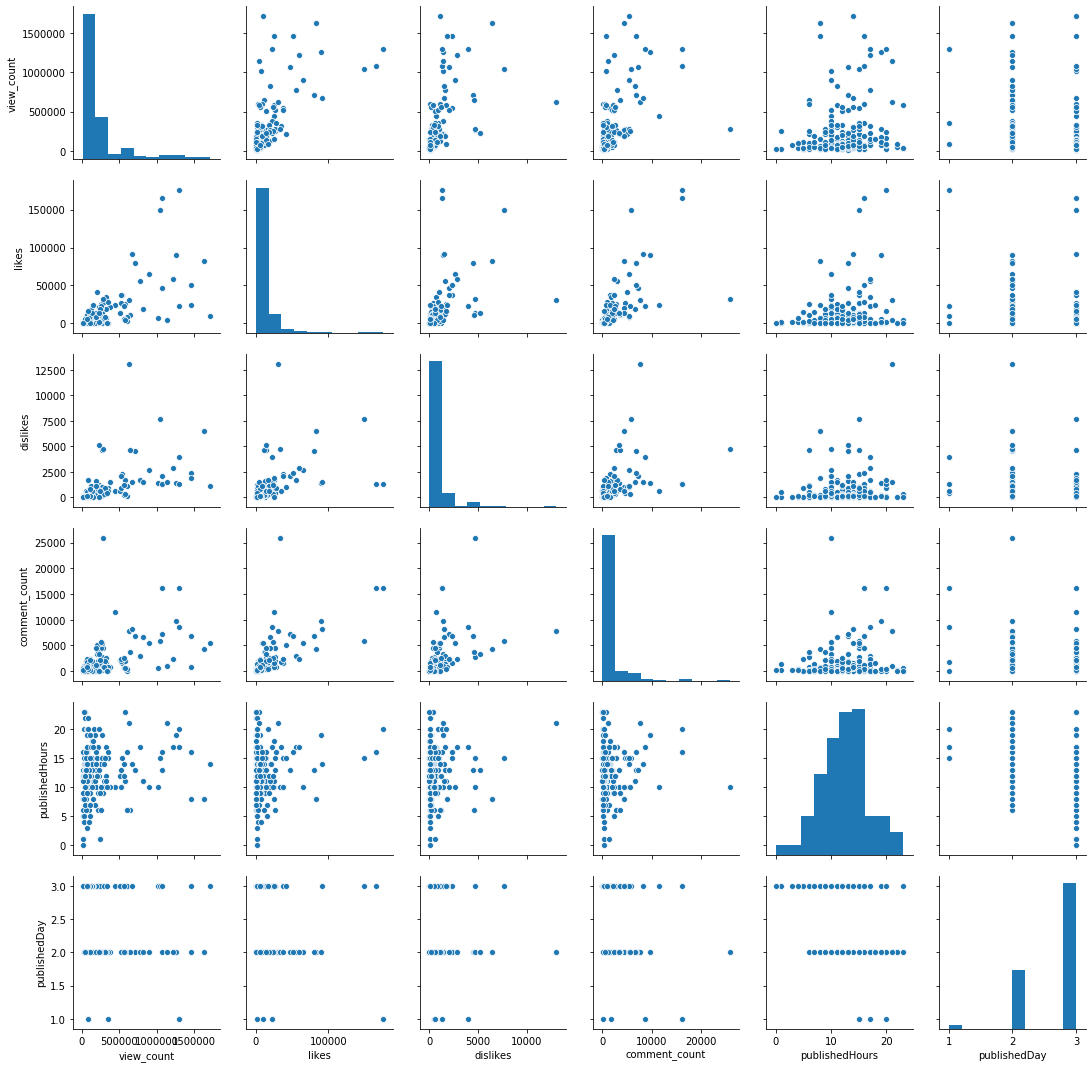

In [136]:
df['publishedHours'] = pd.to_datetime(df['publishedAt']).apply(lambda x: x.strftime('%H')).astype(int)
df['publishedDay'] = pd.to_datetime(df['publishedAt']).apply(lambda x: x.strftime('%w')).astype(int)
sns.pairplot(df[['view_count', 'likes', 'dislikes', 'comment_count', 'publishedHours', 'publishedDay']])

Мы получили несколько новых данных: гистограммы для каждого признака. Интереснее всего она выглядит для дня недели: в среду выкладывается наибольшее количество видео. А в сравнении с ним в поедельник в разы меньше. Да, надо признать, что статистика за понедельник была собрана только начиная с 15:03, но все же видно, что в тренды чаще попадают видео, которые выкладывают в среду. Скорее всего к середине недели и после люди чаще смотрят YouTube. 
Было бы еще интересно получить еще информацию про каждый канал, например, количество подписчиков.

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.